In [1]:
import numpy as np

In [2]:
import pickle
with open(r'C:\Users\user\Desktop\python\object_detection\data_face.pkl', 'rb') as f:
    X_update, y_update = pickle.load(f)

print("Dữ liệu X: ", X_update)
print("Nhãn y: ", y_update)

Dữ liệu X:  [array([[[201, 214, 216],
        [201, 214, 216],
        [201, 214, 216],
        ...,
        [ 49,  58,  61],
        [ 53,  62,  65],
        [ 57,  66,  69]],

       [[201, 214, 216],
        [201, 214, 216],
        [201, 214, 216],
        ...,
        [ 47,  56,  59],
        [ 54,  61,  64],
        [ 57,  66,  69]],

       [[201, 213, 215],
        [202, 214, 216],
        [202, 214, 216],
        ...,
        [ 49,  57,  57],
        [ 54,  59,  60],
        [ 54,  61,  64]],

       ...,

       [[146, 172, 208],
        [147, 173, 209],
        [147, 173, 209],
        ...,
        [ 84, 109, 141],
        [ 84, 109, 141],
        [ 83, 108, 140]],

       [[146, 172, 208],
        [147, 173, 209],
        [147, 173, 209],
        ...,
        [ 84, 109, 141],
        [ 84, 109, 141],
        [ 83, 108, 140]],

       [[147, 172, 206],
        [148, 173, 207],
        [146, 172, 208],
        ...,
        [ 84, 109, 141],
        [ 83, 108, 140],
        [ 8

In [3]:
y = np.array(y_update)



In [4]:
y.shape

(694,)

In [5]:
import cv2
X_resized = []
for img in X_update:
    resized_img = cv2.resize(img, (160, 160))
    X_resized.append(resized_img)
X = np.array(X_resized, dtype=np.uint8)


In [6]:
X.shape

(694, 160, 160, 3)

In [7]:
import torch
from torchvision import transforms as v2

X = X / 255.0
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])


X = (X - mean) / std
X_torch = torch.tensor(X, dtype=torch.float32)
print(X_torch.shape)

torch.Size([694, 160, 160, 3])


In [8]:
X_torch.shape

torch.Size([694, 160, 160, 3])

In [9]:
import torch
import torch.nn as nn
from facenet_pytorch import InceptionResnetV1

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.facenet = InceptionResnetV1(pretrained='vggface2', classify=False).eval()
        for param in self.facenet.parameters():
            param.requires_grad = False 

    def forward(self, x):
        x = self.facenet(x)
        return x
feature_extractor = FeatureExtractor()


In [10]:
X_new = X_torch.permute(0, 3, 1, 2)

with torch.no_grad():
    features = feature_extractor(X_new)

print(features.shape) 


torch.Size([694, 512])


In [11]:
X_feature = np.array(features)
print(X_feature.shape)

(694, 512)


In [12]:
X_feature

array([[ 0.03340272,  0.0380333 , -0.05268848, ..., -0.0504928 ,
         0.04481396, -0.05233682],
       [ 0.05314902,  0.02316893, -0.04790508, ..., -0.04276466,
         0.04611067, -0.06136264],
       [ 0.03642849,  0.0270055 , -0.05771887, ..., -0.0435115 ,
         0.03999272, -0.05992309],
       ...,
       [-0.01911796,  0.04169056, -0.07049468, ..., -0.07850417,
        -0.00348206, -0.01224279],
       [ 0.00381261,  0.02026808, -0.0747207 , ..., -0.06907219,
        -0.00833466, -0.02266349],
       [ 0.00791001,  0.02390351, -0.0661716 , ..., -0.06336334,
        -0.00351777, -0.01813189]], dtype=float32)

In [13]:
X = X_feature

In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [15]:
print(X.shape)
print(y.shape)

(694, 512)
(694,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%")


Độ chính xác của mô hình: 99.28%


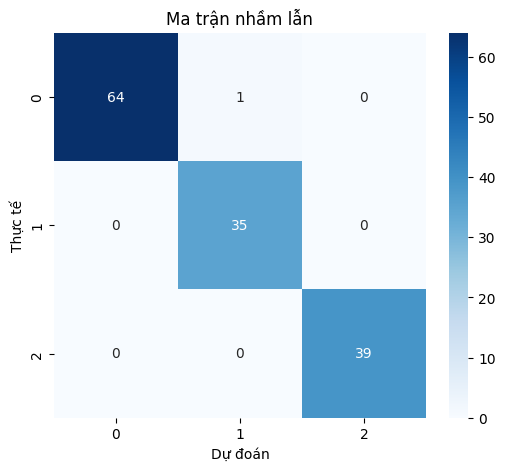

Độ chính xác: 99.28%
Độ nhạy: 99.49%
Độ chính xác: 99.07%
F1 Score: 99.27%


In [17]:
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    recall_score, 
    precision_score, 
    f1_score, 
    roc_curve, 
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy * 100:.2f}%")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Độ nhạy: {recall * 100:.2f}%")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Độ chính xác: {precision * 100:.2f}%")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")


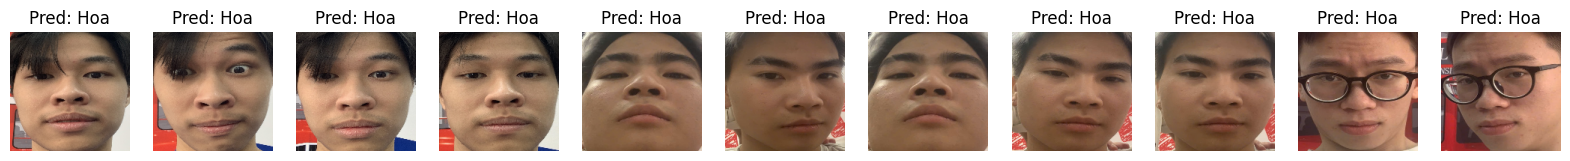

['Hoa' 'Hoa' 'Hoa' 'Hoa' 'Hoa' 'Hoa' 'Hoa' 'Hoa' 'Hoa' 'Hoa' 'Hoa']


In [18]:
import cv2
import numpy as np
import torch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

model1 = StandardScaler()
def process_Imageinput(path):
    X_resized_new = []
    
    for img_path in path:

        img = cv2.imread(img_path)

        resized_image = cv2.resize(img, (160, 160))

        X_resized_new.append(resized_image)
    X_process = np.array(X_resized_new, dtype=np.uint8)
    X_torch_new = torch.tensor(X_process, dtype=torch.float32)
    
    X_new1 = X_torch_new.permute(0, 3, 1, 2)
    
    with torch.no_grad():
        featuressss = feature_extractor(X_new1)
        X_feature1 = np.array(featuressss)
        X_input = X_feature1

    y_prediction = knn.predict(X_input)
    fig, axes = plt.subplots(1, len(X_resized_new), figsize=(20, 5))
    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(X_resized_new[i], cv2.COLOR_BGR2RGB))  
        ax.set_title(f"Pred: {y_prediction[i]}")
        ax.axis('off')    
    plt.show()
    print(y_prediction)
path = [
    "face_1_z5904465562162_7243a333b7abdc1cb8d08922bcbf8fcb.jpg",
    "face_1_z5904465730449_30a77da4e4d9bd2e7528f3c77f47ed0a.jpg",
    "face_1_z5904466637083_0737bda9dd08e49895bf929398cd9a19.jpg",
    "face_1_z5904467169409_58cd064123f3c5f1de9d8922527854c1.jpg",
    "face_1_z5904468984628_0b2618fed0decd531e8523b8751dc7f5.jpg",
    "face_1_z5904469008374_b2824bb9a42b7a3355d0d078ff40cafa.jpg",
    "tuananh.jpg",
    "tuananh2.jpg",
    "tuananh4.jpg",
    "hoa.jpg",
    "hoa2.jpg"
]

process_Imageinput(path)


In [24]:
import numpy as np
import cv2
import torch
import torch.nn as nn
from facenet_pytorch import InceptionResnetV1
import joblib
from sklearn.preprocessing import StandardScaler


class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.facenet = InceptionResnetV1(pretrained='vggface2', classify=False).eval()
        for param in self.facenet.parameters():
            param.requires_grad = False  # Freeze the weights

    def forward(self, x):
        x = self.facenet(x)
        return x

feature_extractor = FeatureExtractor()


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def preprocess_face(face_region):
    resized_face = cv2.resize(face_region, (160, 160))

    X_torch = torch.tensor([resized_face], dtype=torch.float32)/ 255.0 
    X_torch = (X_torch - torch.tensor(mean)) / torch.tensor(std)
    X_torch = X_torch.permute(0, 3, 1, 2)
    X_torch = X_torch.type(torch.FloatTensor)
    print(type(X_torch))
    with torch.no_grad():
        features = feature_extractor(X_torch)
    X_features = features.cpu().numpy()


    return X_features

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
        face_region = frame[y:y+h, x:x+w]
        input_image = preprocess_face(face_region)
        y_prediction = knn.predict(input_image)
        cv2.putText(frame, f'Prediction: {y_prediction[0]}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow('Camera Feed', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'tor

In [20]:
#import pickle
#with open('knn_model.pkl', 'wb') as file:
#    pickle.dump(knn, file)qqq


In [21]:
#import pickle
#
## Load the saved KNN model
#with open('knn_model.pkl', 'rb') as file:
#    knn_loaded = pickle.load(file)
#
# Use the loaded model
# predictions = knn_loaded.predict(X_input)
